In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [455]:
dataset_train = pd.read_csv("Credit_Risk_XTrain.csv")
dataset_test = pd.read_csv("Credit_Risk_Test_data.csv")

In [456]:
dataset_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [457]:
dataset_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [458]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [459]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [460]:
dataset_train['data']='train'
dataset_test['data']='test'

In [461]:
dataset_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [462]:
dataset_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,data
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,test
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,test
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,test


In [463]:
all_data = pd.concat([dataset_train,dataset_test],axis=0)

In [464]:
all_data.shape

(981, 14)

In [465]:
all_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


# Handling missing Number 

In [466]:
all_data.isnull().sum()/len(all_data)*100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
data                  0.000000
dtype: float64

In [467]:
# Gender- object
# Married - object
# Dependents - object
# Self_Employed - object
# LoanAmount - float
# Loan_Amount_Term - float
# Credit_History - flaot
#Imbuation because all are coming less than 25%

In [468]:
all_data['Gender'].value_counts()

Gender
Male      775
Female    182
Name: count, dtype: int64

In [469]:
all_data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [470]:
all_data['Gender'] = all_data['Gender'].fillna('Male')

In [471]:
all_data['Married'].value_counts()

Married
Yes    631
No     347
Name: count, dtype: int64

In [472]:
all_data['Married'].mode()

0    Yes
Name: Married, dtype: object

In [473]:
all_data['Married'] = all_data['Married'].fillna('Yes')

In [474]:
all_data['Dependents'].value_counts()

Dependents
0     545
1     160
2     160
3+     91
Name: count, dtype: int64

In [475]:
all_data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [476]:
all_data['Dependents'] = all_data['Dependents'].fillna('0')

In [477]:
all_data['Self_Employed'].value_counts()

Self_Employed
No     807
Yes    119
Name: count, dtype: int64

In [478]:
all_data['Self_Employed'] = all_data['Self_Employed'].fillna('No')

In [479]:
all_data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
data                   0
dtype: int64

In [480]:
# LoanAmount - float
# Loan_Amount_Term - float
# Credit_History - flaot

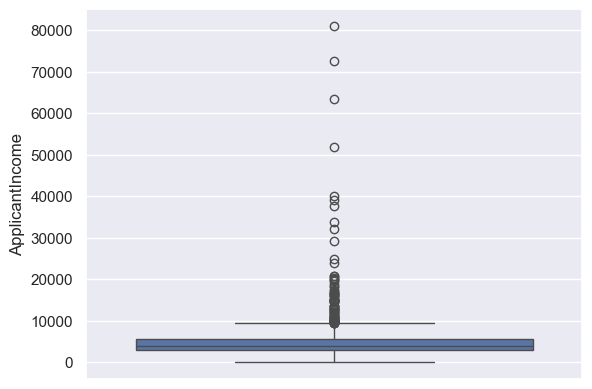

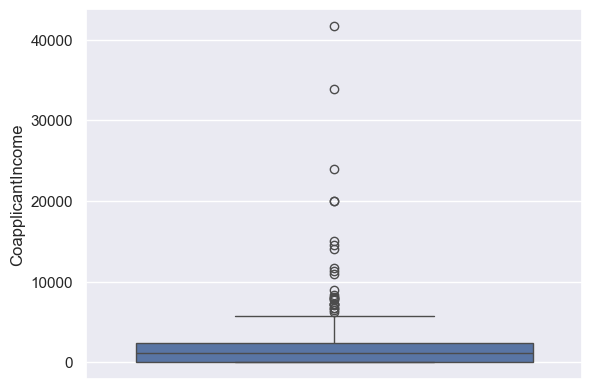

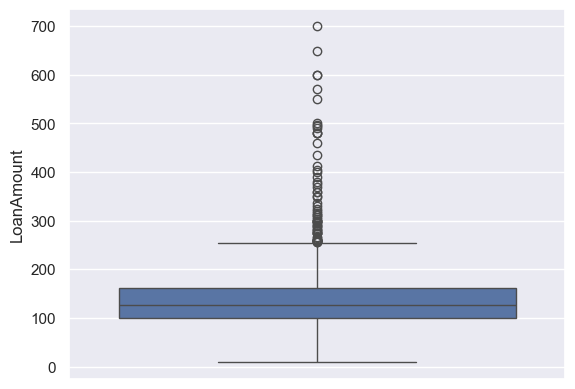

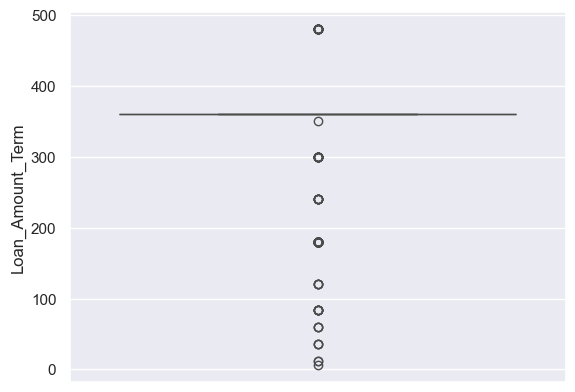

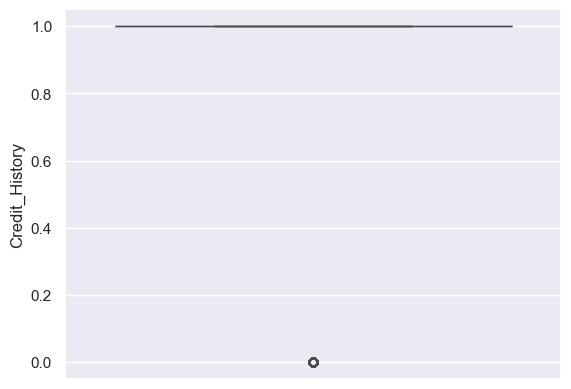

In [481]:
def boxplot(col):
    sns.boxplot(all_data[col])
    plt.show()

for i in list(all_data.select_dtypes(exclude='object').columns)[0:]:
    boxplot(i)
    

In [482]:
all_data['LoanAmount'] = all_data['LoanAmount'].fillna(all_data['LoanAmount'].median())

In [483]:
all_data['Loan_Amount_Term'] = all_data['Loan_Amount_Term'].fillna(all_data['Loan_Amount_Term'].median())
#mean is volatile in nature
#median is not vloatile in nature

In [484]:
 all_data['Credit_History'] = all_data['Credit_History'].fillna(all_data['Credit_History'].mode()[0])

In [485]:
all_data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
data                   0
dtype: int64

In [486]:
all_data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y,train


In [487]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  data               981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


# Encoding

In [488]:
# At one go if you have to do it you can directly go to the OHE 
#otherwise in Label Encoding it will go one by one time consuming

In [489]:
all_data = pd.get_dummies(all_data ,columns= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],drop_first = True)

In [490]:
all_data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,data,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,126.0,360.0,1.0,Y,train,True,False,False,False,False,False,False,False,True
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,train,True,True,True,False,False,False,False,False,False
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,train,True,True,False,False,False,False,True,False,True
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,train,True,True,False,False,False,True,False,False,True
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,train,True,False,False,False,False,False,False,False,True


In [491]:
# Convert dummy variables from True/False to 0/1
dummy_cols = ['Gender_Male','Married_Yes','Dependents_1','Dependents_2','Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']

# Apply the conversion to all selected columns
all_data[dummy_cols] = all_data[dummy_cols].astype(int)

In [492]:
all_data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,data,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,126.0,360.0,1.0,Y,train,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,train,1,1,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,train,1,1,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,train,1,1,0,0,0,1,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,train,1,0,0,0,0,0,0,0,1


In [493]:
train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [494]:
train.shape

(614, 17)

In [495]:
test.shape

(367, 17)

In [496]:
# Splitting into dependent and independent variable

In [497]:
x = train.drop(columns = ['Loan_ID','data','Loan_Status'],axis=1)

In [498]:
y = train['Loan_Status']

In [499]:
x.head(1)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1,0,0,0,0,0,0,0,1


In [500]:
y.head(1)

0    Y
Name: Loan_Status, dtype: object

# In Test data don't split into x and y just write x

# Goal/Ask : Test data  is for prediction this is what we have to perform with the stakeholders whether listed customer get the loan or not

In [501]:
test = test.drop(columns = ['Loan_ID','data','Loan_Status'],axis=1)

In [502]:
test.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [503]:
test.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500.0,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1


In [504]:
x.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.680782,342.410423,0.855049,0.817590,0.653094,0.166124,0.164495,0.083062,0.218241,0.133550,0.379479,0.328990
std,6109.041673,2926.248369,84.123205,64.428629,0.352339,0.386497,0.476373,0.372495,0.371027,0.276201,0.413389,0.340446,0.485653,0.470229
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,126.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Outlier Treatment
## No need to handle the outliers

# Feature Scaling

In [505]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Male              614 non-null    int32  
 6   Married_Yes              614 non-null    int32  
 7   Dependents_1             614 non-null    int32  
 8   Dependents_2             614 non-null    int32  
 9   Dependents_3+            614 non-null    int32  
 10  Education_Not Graduate   614 non-null    int32  
 11  Self_Employed_Yes        614 non-null    int32  
 12  Property_Area_Semiurban  614 non-null    int32  
 13  Property_Area_Urban      614 non-null    int32  
dtypes: float64(4), int32(9), int64(

#If I dont use MinMaxScaler than in encoding part it will put binary 
    # format 0 or 1(some probability value they will fix it thatswhy we have to use fixed value

# Normalisation

## If you're using for algorithms that compute distances like neural networks, SVMs, or KNN,Kmeans use normalization.

# standardization

## If you're using linear models, logistic regression, or algorithms expecting normally distributed features, use standardization.

# Trees 

# Yes, scaling is not required for tree-based algorithms like:

# Decision Trees
# Random Forests
# Gradient Boosted Trees (e.g., XGBoost, LightGBM, CatBoost)

In [506]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x)
test1 = scaler.transform(test)

In [507]:
pd.DataFrame(x).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.859023,-1.000000,-0.661360,0.487179,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,-0.890340,-0.927617,-0.655572,0.487179,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [508]:
pd.DataFrame(test).head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500.0,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1


In [509]:
y.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

# Imbalance Treatment

In [510]:
#I am not increasing the data so I am not using SMOTE here,I will be using stratify 

In [511]:
# Split the training data into training and test

In [512]:
y.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [513]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [514]:
y = np.where(y== 'Y',1,0)

In [515]:
pd.DataFrame(y).value_counts()

0
1    422
0    192
Name: count, dtype: int64

In [516]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,stratify=y,test_size=0.2)

In [517]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [518]:
#Standardisation - Range[-3, 3] 
#Normalisation - Range[0,1]
#MinMaxScaler - Range[-1 to +1]


# Corrected Explanation:
# Standardization:

# Range: Typically around [-3, 3] (but not fixed).
# Used when: Data has a Gaussian (normal) distribution, or you want the data to have a mean of 0 and a standard deviation of 1.
# Normalization:

# Range: [0, 1].
# Used when: You want all features to have the same scale, especially when the data does not follow a normal distribution.
# MinMaxScaler:

# Range: Typically [0, 1], but can be adjusted to any custom range, such as [-1, 1].
# Used when: You want to scale data within a specific range.

# Building Support Vector Machine
### 1)- Kernel - 'linear'
### 2)-Kernale - 'sigmoid'
### 3)-Kernel - 'polynomial
### 4)-Kernel - 'rbf' ***universal/bydefault method - It can handle 2D,3D


In [519]:
from sklearn.metrics import accuracy_score,classification_report

In [520]:
from sklearn.svm import SVC

# kernel = 'linear'
svc_l = SVC(kernel = 'linear')
svc_lr = svc_l.fit(x_train,y_train)
y_pred_train = svc_lr.predict(x_train)
y_pred_test = svc_lr.predict(x_test)
accuracy_score_lr_train = accuracy_score(y_train,y_pred_train)
accuracy_score_lr_test = accuracy_score(y_test,y_pred_test)

# kernel = 'sigmoid'
svc_s = SVC(kernel = 'sigmoid')
svc_sg = svc_l.fit(x_train,y_train)
y_pred_train_s = svc_sg.predict(x_train)
y_pred_test_s = svc_sg.predict(x_test)
accuracy_score_sg_train = accuracy_score(y_train,y_pred_train)
accuracy_score_sg_test = accuracy_score(y_test,y_pred_test)

# kernel = 'polynomial'
svc_p = SVC(kernel = 'rbf')
svc_po = svc_p.fit(x_train,y_train)
y_pred_train_po = svc_po.predict(x_train)
y_pred_test_po = svc_po.predict(x_test)
accuracy_score_rbf_train = accuracy_score(y_train,y_pred_train)
accuracy_score_rbf_test = accuracy_score(y_test,y_pred_test)


# kernel = 'rbf'
svc_rb = SVC(kernel = 'rbf')
svc_rbf = svc_rb.fit(x_train,y_train)
y_pred_train_rbf = svc_rbf.predict(x_train)
y_pred_test_rbf = svc_rbf.predict(x_test)
accuracy_score_rbf_train = accuracy_score(y_train,y_pred_train)
accuracy_score_rbf_test = accuracy_score(y_test,y_pred_test)

# kernel = 'linear'
svc_l = SVC(kernel = 'linear')
svc_lr = svc_l.fit(x_train,y_train)
y_pred_train = svc_lr.predict(x_train)
y_pred_test = svc_lr.predict(x_test)
accuracy_score_lr_train = accuracy_score(y_train,y_pred_train)
accuracy_score_lr_test = accuracy_score(y_test,y_pred_test)

# kernel = 'sigmoid'
svc_s = SVC(kernel = 'sigmoid')
svc_sg = svc_l.fit(x_train,y_train)
y_pred_train_s = svc_sg.predict(x_train)
y_pred_test_s = svc_sg.predict(x_test)
accuracy_score_sg_train = accuracy_score(y_train,y_pred_train)
accuracy_score_sg_test = accuracy_score(y_test,y_pred_test)

# kernel = 'polynomial'
svc_p = SVC(kernel = 'rbf')
svc_po = svc_p.fit(x_train,y_train)
y_pred_train_po = svc_po.predict(x_train)
y_pred_test_po = svc_po.predict(x_test)
accuracy_score_rbf_train = accuracy_score(y_train,y_pred_train)
accuracy_score_rbf_test = accuracy_score(y_test,y_pred_test)


#Naive Bayes Theorem
# 'GaussianNB'
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train,y_train)
y_pred_train_gnb = gnb.predict(x_train)
y_pred_test_gnb = gnb.predict(x_test)
accuracy_score_rbf_train = accuracy_score(y_train,y_pred_train)
accuracy_score_rbf_test = accuracy_score(y_test,y_pred_test)



#Bernoulli's NB Theorem
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb = bnb.fit(x_train,y_train)
y_pred_train_bnb = bnb.predict(x_train)
y_pred_test_bnb = bnb.predict(x_test)
accuracy_score_bnb_train = accuracy_score(y_train,y_pred_train)
accuracy_score_bnb_test = accuracy_score(y_test,y_pred_test)

#Bernoulli's NB Theorem
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb = bnb.fit(x_train,y_train)
y_pred_train_bnb = bnb.predict(x_train)
y_pred_test_bnb = bnb.predict(x_test)
accuracy_score_bnb_train = accuracy_score(y_train,y_pred_train)
accuracy_score_bnb_test = accuracy_score(y_test,y_pred_test)



In [525]:
from sklearn.svm import SVC
# kernel = 'linear'
svc_lr = SVC(kernel='linear')
svc_lr = svc_lr.fit(x_train, y_train)
y_pred_train = svc_lr.predict(x_train)
y_pred_test = svc_lr.predict(x_test)
accuracy_score_lr_train = accuracy_score(y_train, y_pred_train)
accuracy_score_lr_test = accuracy_score(y_test, y_pred_test)

# kernel = 'sigmoid'
svc_sg = SVC(kernel='sigmoid')
svc_sg = svc_sg.fit(x_train, y_train)
y_pred_train_sg = svc_sg.predict(x_train)
y_pred_test_sg = svc_sg.predict(x_test)
accuracy_score_sg_train = accuracy_score(y_train, y_pred_train_sg)
accuracy_score_sg_test = accuracy_score(y_test, y_pred_test_sg)

# kernel = 'poly'
svc_pl = SVC(kernel='poly')
svc_pl = svc_pl.fit(x_train, y_train)
y_pred_train_pl = svc_p.predict(x_train)
y_pred_test_pl = svc_p.predict(x_test)
accuracy_score_pl_train = accuracy_score(y_train, y_pred_train_pl)
accuracy_score_pl_test = accuracy_score(y_test, y_pred_test_pl)

# kernel = 'rbf'
svc_rbf = SVC(kernel='rbf')
svc_rbf = svc_rbf.fit(x_train, y_train)
y_pred_train_rbf = svc_r.predict(x_train)
y_pred_test_rbf = svc_r.predict(x_test)
accuracy_score_rbf_train = accuracy_score(y_train, y_pred_train_rbf)
accuracy_score_rbf_test = accuracy_score(y_test, y_pred_test_rbf)


# naive bayes theorem
#  GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)
y_pred_train_gnb = gnb.predict(x_train)
y_pred_test_gnb = gnb.predict(x_test)
accuracy_score_gnb_train = accuracy_score(y_train, y_pred_train_gnb)
accuracy_score_gnb_test = accuracy_score(y_test, y_pred_test_gnb)

# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb = bnb.fit(x_train, y_train)
y_pred_train_bnb = bnb.predict(x_train)
y_pred_test_bnb = bnb.predict(x_test)
accuracy_score_bnb_train = accuracy_score(y_train, y_pred_train_bnb)
accuracy_score_bnb_test = accuracy_score(y_test, y_pred_test_bnb)


In [526]:
list1 = ['SVM_Linear','SVM_Sigmoid','SVM_Poly','SVM_RBF','GNB','BNB']
list2 = [accuracy_score_lr_test,accuracy_score_sg_test,accuracy_score_pl_test,
        accuracy_score_rbf_test,accuracy_score_gnb_test,accuracy_score_bnb_test]
list3 = [accuracy_score_lr_train,accuracy_score_sg_train,accuracy_score_pl_train,
        accuracy_score_rbf_train,accuracy_score_gnb_train,accuracy_score_bnb_train]

df_test_accuracy = pd.DataFrame({'Method Used':list1,'Test_Accuracy': list2})
df_train_accuracy = pd.DataFrame({'Method Used':list1,'Train_Accuracy': list3})

In [527]:
type(df_test_accuracy)

pandas.core.frame.DataFrame

Axes(0.125,0.11;0.775x0.77)


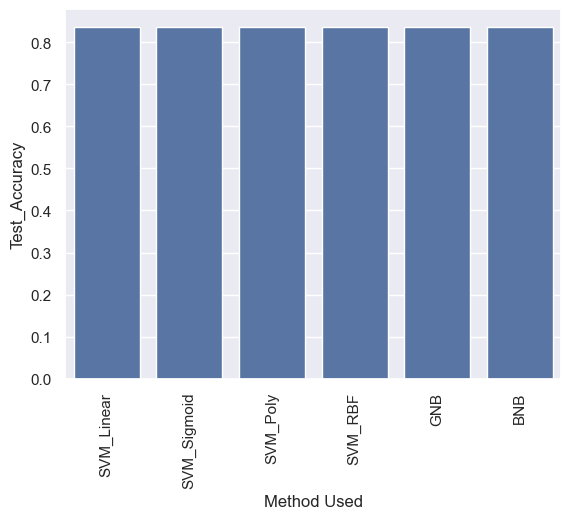

In [528]:
chart = sns.barplot(x='Method Used', y='Test_Accuracy', data=df_test_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

Axes(0.125,0.11;0.775x0.77)


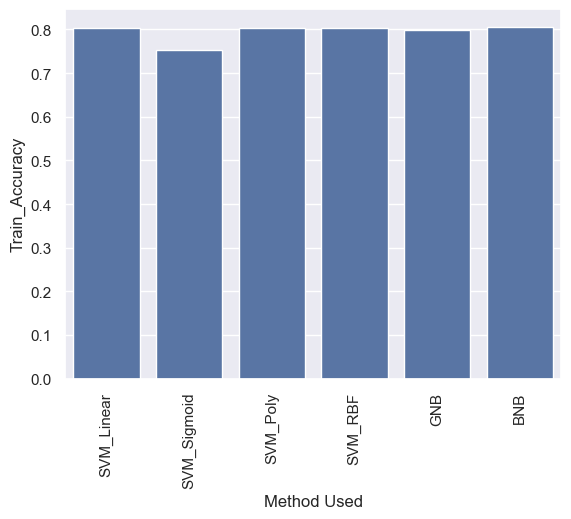

In [529]:
chart = sns.barplot(x='Method Used', y='Train_Accuracy', data=df_train_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

# Support Vector Machine -rbf

In [530]:
final_output = svc_rbf.predict(test1)
print(final_output)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [531]:
final_output_test = pd.concat([pd.DataFrame(test),pd.DataFrame(final_output)],axis=1)

In [532]:
final_output_test.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,0
0,5720,0.0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1,1
1,3076,1500.0,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
2,5000,1800.0,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
3,2340,2546.0,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
4,3276,0.0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1,1
5,2165,3422.0,152.0,360.0,1.0,1,1,0,0,0,1,1,0,1,1
6,2226,0.0,59.0,360.0,1.0,0,0,1,0,0,1,0,1,0,1
7,3881,0.0,147.0,360.0,0.0,1,1,0,1,0,1,0,0,0,0
8,13633,0.0,280.0,240.0,1.0,1,1,0,1,0,0,0,0,1,1
9,2400,2400.0,123.0,360.0,1.0,1,0,0,0,0,1,0,1,0,1


In [533]:
print(len(final_output))

367


In [534]:
print(len(test1))

367


In [535]:
print(type(final_output))

<class 'numpy.ndarray'>


In [536]:
pd.DataFrame(final_output).to_csv('Final_Output_Loan.csv')

# PCA

In [537]:
# Principal Component Analysis - Dimension Reduction - Feature  Engineering Techniques

In [631]:
print(x_train.shape,x_test.shape)

(414, 6) (104, 6)


In [632]:
from sklearn.decomposition import PCA

In [634]:
pca = PCA(n_components=None)
#None - all Components/variables/features
x_train_n = pca.fit_transform(x_train)
x_test_n = pca.fit_transform(x_test)

In [635]:
print(x_train_n.shape,x_test_n.shape)

(414, 6) (104, 6)


In [636]:
pd.DataFrame(x_train)

,Index,interest_rate,credit,Gender,previous,duration
444,444,1.039,0,0,1,655
118,118,1.270,0,1,0,412
336,336,1.262,0,0,0,690
396,396,1.299,0,1,0,262
411,411,1.259,0,1,1,582
...,...,...,...,...,...,...
379,379,0.904,0,0,1,244
122,122,0.977,0,0,1,252
48,48,1.281,0,1,0,172
456,456,0.884,0,0,1,1019


In [637]:
pd.DataFrame(x_train_n)

,0,1,2,3,4,5
0,288.413822,182.653866,-1.601633,-0.326360,0.690905,-0.047556
1,39.541968,-138.886263,-1.674155,0.735650,-0.124892,-0.034866
2,321.449444,74.036593,-1.366952,-0.221910,-0.267933,-0.055083
3,-105.392105,141.788094,-1.543718,0.770418,-0.169631,-0.011304
4,214.827271,150.982857,-1.457582,0.660791,0.825177,-0.004833
...,...,...,...,...,...,...
409,-123.697159,125.117891,-2.012036,-0.343342,0.680723,-0.060976
410,-120.358958,-131.984908,-2.106848,-0.377547,0.725053,-0.083221
411,-201.687915,-204.522490,-1.845643,0.721761,-0.120038,-0.044400
412,652.571604,188.051074,-1.542629,-0.318520,0.688870,-0.043516


# which all variable are significant after applying PCA

In [638]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.98810546e-01, 1.01172028e-01, 1.59026235e-05, 1.01188317e-06,
       3.83043890e-07, 1.27759897e-07])

In [639]:
0.2185096+0.16705273+0.10619259+0.10070858+0.07851989+0.0743038+0.07239341+0.06213933+0.05721305+0.03774947+0.01174634+0.00837826+0.00354408+0.00154887

1.0

In [640]:
pca_9 = PCA(n_components=None)
#None - all Components/variables/features
x_train_9 = pca_9.fit_transform(x_train)
x_test_9 = pca_9.fit_transform(x_train)

In [641]:
print(x_train_9.shape,x_test_9.shape,y_train.shape,y_test.shape)

(414, 6) (414, 6) (414,) (104,)


In [642]:
# kernel = 'rbf'
svc_rbf = SVC(kernel='rbf')
svc_rbf = svc_rbf.fit(x_train_9, y_train)
y_pred_train_rbf = svc_r.predict(x_train_9)
y_pred_test_rbf = svc_r.predict(x_test_9)
# accuracy_score_rbf_train = accuracy_score(y_train, y_pred_train_rbf)
# accuracy_score_rbf_test = accuracy_score(y_test, y_pred_test_rbf)

ValueError: X has 6 features, but SVC is expecting 14 features as input.

In [643]:
accuracy_score_rbf_train = accuracy_score(y_train, y_pred_train_rbf)
print(accuracy_score_rbf_train)

ValueError: Found input variables with inconsistent numbers of samples: [414, 491]

In [644]:
print(y_test.shape,x_test_9.shape)

(104,) (414, 6)


In [557]:
accuracy_score_rbf_test = accuracy_score(y_test, y_pred_test_rbf)
print(accuracy_score_rbf_test)

ValueError: Found input variables with inconsistent numbers of samples: [123, 491]

# Bank Data CSV

In [612]:
bank = pd.read_csv('Bank-data.csv')

In [613]:
bank.head()

,Index,interest_rate,credit,Gender,previous,duration,Churn
0,0,1.334,0,1,0,117,no
1,1,0.767,0,0,1,274,yes
2,2,4.858,0,1,0,167,no
3,3,4.120,0,0,0,686,yes
4,4,4.856,0,1,0,159,no


In [614]:
bank['Churn'] = bank['Churn'].astype('category')
bank['Churn'] = bank['Churn'].cat.codes
bank.head()

,Index,interest_rate,credit,Gender,previous,duration,Churn
0,0,1.334,0,1,0,117,0
1,1,0.767,0,0,1,274,1
2,2,4.858,0,1,0,167,0
3,3,4.120,0,0,0,686,1
4,4,4.856,0,1,0,159,0


In [615]:
x = bank.iloc[:,:-1]
y = bank.iloc[:,-1]

In [616]:
x.head(1)

,Index,interest_rate,credit,Gender,previous,duration
0,0,1.334,0,1,0,117


In [617]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=101,stratify=y)

In [618]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train,y_train)
y_pred = logit.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8846153846153846


In [619]:
pca = PCA(n_components=None) #consider all features
#None - all Components/variables/features
x_train_n = pca.fit_transform(x_train)
x_test_n = pca.fit_transform(x_train)

In [620]:
print(pd.DataFrame(x_train).head())
print('******************'*10)
print(pd.DataFrame(x_train_n).head())

     Index  interest_rate  credit  Gender  previous  duration
444    444          1.039       0       0         1       655
118    118          1.270       0       1         0       412
336    336          1.262       0       0         0       690
396    396          1.299       0       1         0       262
411    411          1.259       0       1         1       582
************************************************************************************************************************************************************************************
            0           1         2         3         4         5
0  288.413822  182.653866 -1.601633 -0.326360  0.690905 -0.047556
1   39.541968 -138.886263 -1.674155  0.735650 -0.124892 -0.034866
2  321.449444   74.036593 -1.366952 -0.221910 -0.267933 -0.055083
3 -105.392105  141.788094 -1.543718  0.770418 -0.169631 -0.011304
4  214.827271  150.982857 -1.457582  0.660791  0.825177 -0.004833


In [621]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.13287832e-01, 1.86680245e-01, 2.92496489e-05, 1.59000149e-06,
       8.16442772e-07, 2.66576985e-07])

In [622]:
#8.45355953e-01 - 89.8%
#1.54617167e-01 - 10.1% #convert this number to decimal

#remaining contribution to predict churn data is apprx 0.01%

# 2.46375991e-05
# 1.37224339e-06
# 6.58368830e-07
# 2.12005354e-07


In [627]:
pca2 = PCA(n_components=2)
x_train_2= pca2.fit_transform(x_train)
x_test_2 = pca2.fit_transform(x_test)


In [630]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train_2,y_train)
y_pred = logit.predict(x_test_2)
print(accuracy_score(y_pred,y_test))

# from sklearn.linear_model import LogisticRegression
# logit = LogisticRegression()
# logit.fit(x_train_2, y_train)
# y_pred = logit.predict(x_test_2)
# accuracy_score(y_test, y_pred)

0.7211538461538461


In [ ]:
#whe you standardisation that time only you can PCA

# Hyperparameters

In [ ]:
# 1) Grid Search Cv - for less data
# 2) Randomized Search CV - for large data - it take lesser time , they will randomly pick some valueand they can chcek it

In [645]:
from sklearn.model_selection import GridSearchCV #it takes more time with each permutation and combination but it gives better result than RandomizedSearch CV

In [650]:
from sklearn.model_selection import RandomizedSearchCV

In [649]:
# kernel = 'rbf'
SVC(kernel='rbf')
param_grid = {'C':[1.0,0.1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf','linear','polynomial']}
#c is higher - better is model and gamma is lower - better is model
grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(x_train,y_train)
grid_predict = grid.predict(x_test)
print(accuracy_score(grid_predict,y_test))
print("Best Tuned Hyperparameter k : {}".format(grid.best_params_))

0.8653846153846154
Best Tuned Hyperparameter k : {'C': 100, 'gamma': 1, 'kernel': 'linear'}
